In [18]:
import re

import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def process_time_index(csv_path):
    df = pd.read_csv(csv_path)
    df['Time'] = pd.to_datetime(df['Time'])
    df['Time'] = df['Time'] - df['Time'].min()
    df.set_index('Time', inplace=True)
    return df
total_requests = process_time_index('quick/perfwamd2_2025-08-21_13-30-00-_None_Total Requests per Scenario.csv')

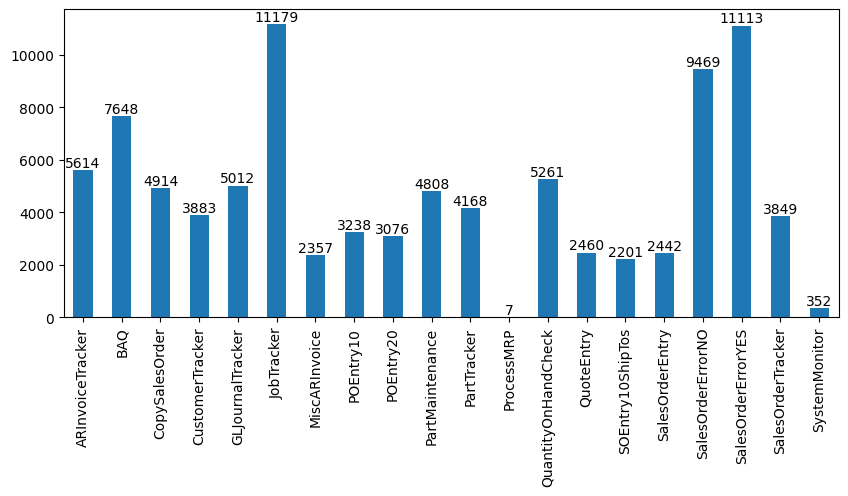

In [20]:
ax = total_requests.aggregate('max').plot(use_index=True, figsize=(10,4), kind='bar')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f'{int(p.get_height())}',
        ha='center',
        va='bottom'
    )
plt.show()

In [21]:
aggregate  = total_requests.aggregate('max')

In [22]:
aggregate

ARInvoiceTracker        5614.0
BAQ                     7648.0
CopySalesOrder          4914.0
CustomerTracker         3883.0
GLJournalTracker        5012.0
JobTracker             11179.0
MiscARInvoice           2357.0
POEntry10               3238.0
POEntry20               3076.0
PartMaintenance         4808.0
PartTracker             4168.0
ProcessMRP                 7.0
QuantityOnHandCheck     5261.0
QuoteEntry              2460.0
SOEntry10ShipTos        2201.0
SalesOrderEntry         2442.0
SalesOrderErrorNO       9469.0
SalesOrderErrorYES     11113.0
SalesOrderTracker       3849.0
SystemMonitor            352.0
dtype: float64

In [23]:
def to_milliseconds(val):
    if pd.isna(val) or val == '':
        return None
    match = re.match(r'([\d\.]+)\s*(ms|s)', str(val))
    if not match:
        return None
    num, unit = match.groups()
    num = float(num)
    return pd.Timedelta(num, unit=unit)

In [24]:
ttf = process_time_index('quick/perfwamd2_2025-08-21_13-30-00-_None_TTFB per Scenario.csv')
ttf.describe()

,ARInvoiceTracker,BAQ,CopySalesOrder,CustomerTracker,GLJournalTracker,JobTracker,MiscARInvoice,POEntry10,POEntry20,PartMaintenance,PartTracker,ProcessMRP,QuantityOnHandCheck,QuoteEntry,SOEntry10ShipTos,SalesOrderEntry,SalesOrderErrorNO,SalesOrderErrorYES,SalesOrderTracker,SystemMonitor
count,278,277,278,279,278,277,279,279,279,277,279,21,278,279,279,279,278,277,279,279
unique,47,50,93,44,94,111,69,73,75,39,112,3,47,83,70,85,47,35,82,156
top,106 ms,170 ms,1.66 s,111 ms,72.0 ms,79.9 ms,223 ms,198 ms,193 ms,114 ms,237 ms,212 ms,172 ms,385 ms,361 ms,397 ms,204 ms,118 ms,255 ms,71.1 ms
freq,40,18,16,25,13,9,19,26,20,56,7,19,24,12,17,15,45,44,20,8


In [25]:
for col in ttf.columns:
    ttf[col] = ttf[col].apply(to_milliseconds)

In [26]:
def to_aggregate_string(val):
    if val < 1:
        return f'{val * 1000:.0f} ms'
    else:
        return f'{val:.2f} s'
ttf.aggregate('mean').apply(lambda x: to_aggregate_string(x.total_seconds()))

ARInvoiceTracker       123 ms
BAQ                    174 ms
CopySalesOrder         1.37 s
CustomerTracker        124 ms
GLJournalTracker        77 ms
JobTracker              87 ms
MiscARInvoice          234 ms
POEntry10              198 ms
POEntry20              193 ms
PartMaintenance        123 ms
PartTracker            249 ms
ProcessMRP             213 ms
QuantityOnHandCheck    172 ms
QuoteEntry             382 ms
SOEntry10ShipTos       356 ms
SalesOrderEntry        395 ms
SalesOrderErrorNO      209 ms
SalesOrderErrorYES     125 ms
SalesOrderTracker      257 ms
SystemMonitor           81 ms
dtype: object

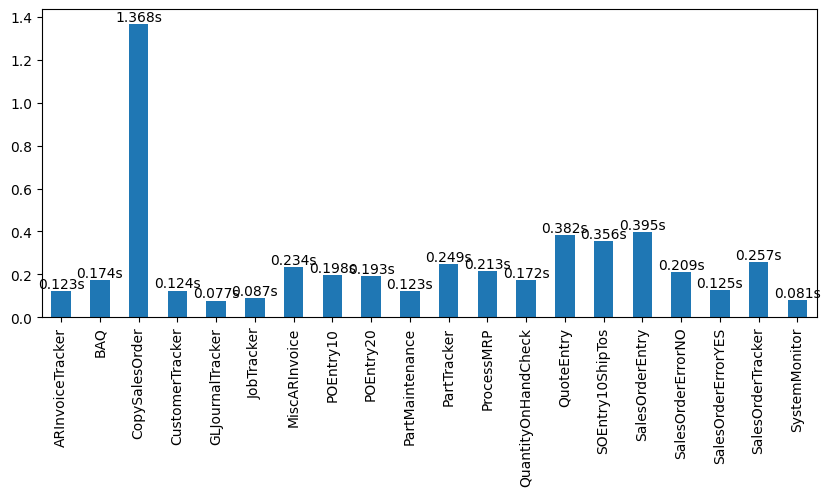

In [27]:
ax = ttf.aggregate('mean').apply(lambda x: x.total_seconds()).plot(use_index=True, figsize=(10,4), kind='bar')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f'{p.get_height():.3f}s',
        ha='center',
        va='bottom'
    )
plt.show()

In [28]:
group_duration = process_time_index('quick/None_2025-08-21_13-30-00-_None_Panel Title.csv')
group_duration.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'quick/None_2025-08-21_13-30-00-_None_Panel Title.csv'